In [2]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
questURL = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest = requests.get(questURL).json()
Quest

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:28 00:13:26.360',
  'Expression': 'covid 19',
  'NStudiesAvail': 347033,
  'NStudiesFound': 2905,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04395482'],
    'BriefTitle': ['Lung CT Scan Analysis of SARS-CoV2 Induced Lung Injury'],
    'StatusVerifiedDate': ['May 2020'],
    'CompletionDate': ['October 15, 2020'],
    'OrgFullName': ['University of Milano Bicocca'],
    'OrgClass': ['OTHER'],
    'Keyword': ['Lung injury', 'sars-covid-2', 'coronavirus infection'],
    'LocationCity': ['Bergamo',
     'Bergamo',
     'Ferrara',
     'Lecco',
     'Melzo',
     'Monza',
     'Rimini',
     'San Marino'],
    'LocationCountry': ['Italy',
   

In [4]:
limit1 = Quest['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit1

2905

In [5]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   
tempL1 = requests.get(tempURL1).json()

tempURL2 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk=2000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

tempURL3 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=2001\
           &max_rnk={limit1}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL3 = requests.get(tempURL3).json()

Q1_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q1_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']
Q1_tempL3 = tempL3['StudyFieldsResponse']['StudyFields']


In [6]:
Q1_tempDF1 = pd.DataFrame(Q1_tempL1)
Q1_tempDF2 = pd.DataFrame(Q1_tempL2)
Q1_tempDF3 = pd.DataFrame(Q1_tempL3)

In [7]:
def change_remove1(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    return df

In [8]:
clean2 = change_remove1(Q1_tempDF2)

In [9]:
def change_remove45(df):
    df = df.astype(str)
    df["NCTId"] = df["NCTId"].str.lstrip("['")
    df["NCTId"] = df["NCTId"].str.rstrip("']")
    df["BriefTitle"] = df["BriefTitle"].str.lstrip("['")
    df["BriefTitle"] = df["BriefTitle"].str.rstrip("']")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.lstrip("['")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.rstrip("']")
    df["CompletionDate"] = df["CompletionDate"].str.lstrip("['")
    df["CompletionDate"] = df["CompletionDate"].str.rstrip("']")
    df["OrgFullName"] = df["OrgFullName"].str.lstrip("['")
    df["OrgFullName"] = df["OrgFullName"].str.rstrip("']")
    df["OrgClass"] = df["OrgClass"].str.lstrip("['")
    df["OrgClass"] = df["OrgClass"].str.rstrip("']")
    df["Keyword"] = df["Keyword"].str.lstrip("['")
    df["Keyword"] = df["Keyword"].str.rstrip("']")
    df["LocationCity"] = df["LocationCity"].str.lstrip("['")
    df["LocationCity"] = df["LocationCity"].str.rstrip("']")
    df["LocationCountry"] = df["LocationCountry"].str.lstrip("['")
    df["LocationCountry"] = df["LocationCountry"].str.rstrip("']")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.lstrip("['")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.rstrip("']")
    df["StdAge"] = df["StdAge"].str.lstrip("['")
    df["StdAge"] = df["StdAge"].str.rstrip("']")
    df["Gender"] = df["Gender"].str.lstrip("['")
    df["Gender"] = df["Gender"].str.rstrip("']")
    df["LocationFacility"] = df["LocationFacility"].str.lstrip("['")
    df["LocationFacility"] = df["LocationFacility"].str.rstrip("']")
    df["StartDate"] = df["StartDate"].str.lstrip("['")
    df["StartDate"] = df["StartDate"].str.rstrip("']")
    df["LocationStatus"] = df["LocationStatus"].str.lstrip("['")
    df["LocationStatus"] = df["LocationStatus"].str.rstrip("']")
    df["NCTId"] = df["NCTId"].str.replace("'","")
    df["BriefTitle"] = df["BriefTitle"].str.replace("'","")
    df["StatusVerifiedDate"] = df["StatusVerifiedDate"].str.replace("'","")
    df["CompletionDate"] = df["CompletionDate"].str.replace("'","")
    df["OrgFullName"] = df["OrgFullName"].str.replace("'","")
    df["OrgClass"] = df["OrgClass"].str.replace("'","")
    df["Keyword"] = df["Keyword"].str.replace("'","")
    df["LocationCity"] = df["LocationCity"].str.replace("'","")
    df["LocationCountry"] = df["LocationCountry"].str.replace("'","")
    df["EnrollmentCount"] = df["EnrollmentCount"].str.replace("'","")
    df["StdAge"] = df["StdAge"].str.replace("'","")
    df["Gender"] = df["Gender"].str.replace("'","")
    df["StartDate"] = df["StartDate"].str.replace("'","")
    df["LocationFacility"] = df["LocationFacility"].str.replace("'","")
    df["LocationFacility"] = df["LocationStatus"].str.replace("'","")
    df["EnrollmentCount"] = pd.to_numeric(df["EnrollmentCount"])
    return df

In [10]:
clean_Q1_tempDF3 = change_remove45(Q1_tempDF3)
clean_Q1_tempDF3

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,2001,NCT04350086,Use of Dexmedetomidine in Light to Moderate Se...,April 2020,"April 20, 2020","November 20, 2020","University Hospital, Limoges",OTHER,"COVID-19, sars-cov-2, infection, respiratory f...",,,Limoges,France,10.0,"Adult, Older Adult",All
1,2002,NCT04382924,Safety and Efficacy of NP-120 (Ifenprodil) for...,May 2020,July 2020,February 2022,Algernon Pharmaceuticals,INDUSTRY,,,,,,682.0,"Adult, Older Adult",All
2,2003,NCT04369469,Efficacy and Safety Study of IV Ravulizumab in...,April 2020,"May 11, 2020",February 2021,Alexion Pharmaceuticals,INDUSTRY,"acute lung injury, acute respiratory distress ...","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Washington, Boston, Detroit, Créteil, Garches,...","United States, United States, United States, F...",270.0,"Adult, Older Adult",All
3,2004,NCT04357860,Clinical Trial of Sarilumab in Adults With COV...,April 2020,"April 27, 2020","July 27, 2020",Maimónides Biomedical Research Institute of Có...,OTHER,,,,Córdoba,Spain,120.0,"Adult, Older Adult",All
4,2005,NCT04334148,Healthcare Worker Exposure Response and Outcom...,July 2020,"April 22, 2020",September 2020,Duke University,OTHER,"Hydroxychloroquine, Coronavirus Infections, No...","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Aurora, Gainesville, Jacksonville, Leesburg, M...","United States, United States, United States, U...",2000.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2901,NCT03728257,Lung Transplant G0 (LTGO): Improving Self-Mana...,June 2020,"March 25, 2019","April 8, 2022",University of Pittsburgh,OTHER,,Recruiting,Recruiting,Pittsburgh,United States,112.0,"Adult, Older Adult",All
901,2902,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
902,2903,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
903,2904,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female


In [11]:
clean_Q1_tempDF2 = change_remove45(Q1_tempDF2)
clean_Q1_tempDF1 = change_remove45(Q1_tempDF1)

In [12]:
query = 'coronavirus'
quest2URL = f'http://ClinicalTrials.gov/api/query/study_fields?expr={query}\
           &min_rnk=1\
           &max_rnk=1\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
Quest2 = requests.get(quest2URL).json()
Quest2

{'StudyFieldsResponse': {'APIVrs': '1.01.02',
  'DataVrs': '2020:07:28 00:13:26.360',
  'Expression': 'coronavirus',
  'NStudiesAvail': 347033,
  'NStudiesFound': 1472,
  'MinRank': 1,
  'MaxRank': 1,
  'NStudiesReturned': 1,
  'FieldList': ['NCTId',
   'BriefTitle',
   'StatusVerifiedDate',
   'StartDate',
   'CompletionDate',
   'OrgFullName',
   'OrgClass',
   'Keyword',
   'LocationFacility',
   'LocationStatus',
   'LocationCity',
   'LocationCountry',
   'EnrollmentCount',
   'StdAge',
   'Gender'],
  'StudyFields': [{'Rank': 1,
    'NCTId': ['NCT04279795'],
    'BriefTitle': ['Detection of 2019 Novel Coronavirus in Multiple Organ System and Its Relationship With Clinical Manifestations'],
    'StatusVerifiedDate': ['February 2020'],
    'StartDate': ['January 20, 2020'],
    'CompletionDate': ['February 28, 2021'],
    'OrgFullName': ['Third Affiliated Hospital, Sun Yat-Sen University'],
    'OrgClass': ['OTHER'],
    'Keyword': ['2019 Novel Coronavirus'],
    'LocationFacility'

In [13]:
limit2 = Quest2['StudyFieldsResponse']['NStudiesFound'] #make sure we don't ask for results outside of the scope of our query
limit2

1472

In [14]:
tempURL1 = 'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1\
           &max_rnk=1000\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'   

tempL1 = requests.get(tempURL1).json()

tempURL2 = f'http://ClinicalTrials.gov/api/query/study_fields?expr=covid+19\
           &min_rnk=1001\
           &max_rnk={limit2}\
           &fields=\
               NCTId,\
               BriefTitle,\
               StatusVerifiedDate,\
               StartDate,\
               CompletionDate,\
               OrgFullName,\
               OrgClass,\
               keyword,\
               LocationFacility,\
               LocationStatus,\
               LocationCity,\
               LocationCountry,\
               EnrollmentCount,\
               STDAge,\
               Gender\
           &fmt=JSON'
tempL2 = requests.get(tempURL2).json()                                                             

Q2_tempL1 = tempL1['StudyFieldsResponse']['StudyFields']
Q2_tempL2 = tempL2['StudyFieldsResponse']['StudyFields']


In [15]:
Q2_tempDF1 = pd.DataFrame(Q2_tempL1)
Q2_tempDF2 = pd.DataFrame(Q2_tempL2)

In [16]:
clean_Q2_tempDF1 = change_remove45(Q2_tempDF1)
clean_Q2_tempDF1

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,NCT04362995,St. Jude Tracking of Viral and Host Factors As...,May 2020,"April 23, 2020","March 20, 2025","""St. Jude Childrens Research Hospital""",OTHER,,Recruiting,Recruiting,Memphis,United States,1517.0,"Adult, Older Adult",All
996,997,NCT04409522,Evaluation of Therapeutic Effects of Melatonin...,May 2020,"May 12, 2020","September 25, 2020",Baqiyatallah Medical Sciences University,OTHER,,Recruiting,Recruiting,Tehran,"Iran, Islamic Republic of",55.0,"Child, Adult, Older Adult",All
997,998,NCT04351919,Assessment of Efficacy and Safety of HCQ and A...,May 2020,"May 5, 2020","July 15, 2020",Abderrahmane Mami Hospital,OTHER,,,,Tunis,Tunisia,400.0,"Adult, Older Adult",All
998,999,NCT04363866,A Pilot Study to Assess Hydroxychloroquine in ...,April 2020,May 2020,June 2021,Oregon Health and Science University,OTHER,"SARS-CoV-2, COVID-19, Hydroxychloroquine, Coro...",,,Portland,United States,40.0,"Adult, Older Adult",All


In [17]:
clean_Q2_tempDF2 = change_remove45(Q2_tempDF2)
clean_Q2_tempDF2

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1001,NCT04354870,COVID-19 PrEP HCW HCQ Study,April 2020,"April 3, 2020","September 1, 2020",NYU Langone Health,OTHER,,Recruiting,Recruiting,New York,United States,350.0,"Adult, Older Adult",All
1,1002,NCT04341038,Clinical Trial to Evaluate Methylprednisolone ...,April 2020,"April 1, 2020","July 1, 2020",Hospital Universitari de Bellvitge,OTHER,,Recruiting,Recruiting,"""LHospitalet de Llobregat""",Spain,84.0,"Adult, Older Adult",All
2,1003,NCT04445493,EPISODE-PS-COVID: hEad Pulse for Ischemic StrO...,June 2020,July 2020,June 2021,"MindRhythm, Inc.",INDUSTRY,,,,,,250.0,"Adult, Older Adult",All
3,1004,NCT04431466,A Study to Compare the Efficacy and Safety of ...,June 2020,"July 1, 2020","July 1, 2021",Universidade Federal de Sao Carlos,OTHER,"coronavirus infections, SARS-CoV-2, COVID-19, ...",,,São Carlos,Brazil,64.0,"Adult, Older Adult",All
4,1005,NCT04358549,Study of the Use of Favipiravir in Hospitalize...,June 2020,"April 17, 2020",December 2020,"Fujifilm Pharmaceuticals U.S.A., Inc.",INDUSTRY,,"Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Scottsdale, Boston, Boston, Boston, Worcester,...","United States, United States, United States, U...",50.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,1468,NCT04343989,A Randomized Placebo-controlled Safety and Dos...,May 2020,"March 31, 2020","July 1, 2020",NYU Langone Health,OTHER,,Recruiting,Recruiting,New York,United States,90.0,"Adult, Older Adult",All
468,1469,NCT04385069,COVID-19 Hyperinflammation Syndrome (COV-HI): ...,April 2020,"April 16, 2020","July 5, 2020","University College, London",OTHER,,"Not yet recruiting, Recruiting, Not yet recrui...","Not yet recruiting', 'Recruiting', 'Not yet re...","Leeds, London, Newcastle Upon Tyne, Nottingham...","United Kingdom, United Kingdom, United Kingdom...",500.0,"Adult, Older Adult",All
469,1470,NCT04484493,Corticosteroid Nasal Spray in COVID-19 Anosmia,July 2020,"August 1, 2020","September 1, 2020",Benha University,OTHER,"covid19, anosmia, momentasone nasal spray",,,Banhā,Egypt,50.0,"Adult, Older Adult",All
470,1471,NCT04438057,Evaluating the Efficacy of Convalescent Plasma...,June 2020,"July 6, 2020","July 6, 2021",Metro Infectious Disease Consultants,OTHER,convalescent plasma,,,Burr Ridge,United States,150.0,"Adult, Older Adult",All


In [18]:
DF_QQ = pd.concat([clean_Q1_tempDF1, clean_Q1_tempDF2, clean_Q1_tempDF3, clean_Q2_tempDF1, clean_Q2_tempDF2], ignore_index=True)
DF_QQ = DF_QQ.drop_duplicates()
DF_QQ

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4372,1468,NCT04343989,A Randomized Placebo-controlled Safety and Dos...,May 2020,"March 31, 2020","July 1, 2020",NYU Langone Health,OTHER,,Recruiting,Recruiting,New York,United States,90.0,"Adult, Older Adult",All
4373,1469,NCT04385069,COVID-19 Hyperinflammation Syndrome (COV-HI): ...,April 2020,"April 16, 2020","July 5, 2020","University College, London",OTHER,,"Not yet recruiting, Recruiting, Not yet recrui...","Not yet recruiting', 'Recruiting', 'Not yet re...","Leeds, London, Newcastle Upon Tyne, Nottingham...","United Kingdom, United Kingdom, United Kingdom...",500.0,"Adult, Older Adult",All
4374,1470,NCT04484493,Corticosteroid Nasal Spray in COVID-19 Anosmia,July 2020,"August 1, 2020","September 1, 2020",Benha University,OTHER,"covid19, anosmia, momentasone nasal spray",,,Banhā,Egypt,50.0,"Adult, Older Adult",All
4375,1471,NCT04438057,Evaluating the Efficacy of Convalescent Plasma...,June 2020,"July 6, 2020","July 6, 2021",Metro Infectious Disease Consultants,OTHER,convalescent plasma,,,Burr Ridge,United States,150.0,"Adult, Older Adult",All


In [19]:
dups_color = DF_QQ.pivot_table(index=['NCTId'], aggfunc='size')
print (dups_color)

NCTId
NCT01306084    1
NCT02517489    1
NCT02656381    1
NCT02735707    1
NCT02765191    1
              ..
NCT04488588    1
NCT04488796    1
NCT04489407    1
NCT04489446    1
NCT04489628    1
Length: 2905, dtype: int64


In [20]:
df_final = DF_QQ.drop_duplicates(subset='NCTId', keep="first")
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,2902,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
2902,2903,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
2903,2904,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female
2904,2905,NCT04180709,CBT to Reduce Insomnia and Improve Social Reco...,June 2020,"August 31, 2020","November 30, 2022",University of Cambridge,OTHER,"Cognition, Social Recovery, Immunopsychiatry, ...",,,Cambridge,United Kingdom,44.0,"Adult, Older Adult",All


In [21]:
df_final

,Rank,NCTId,BriefTitle,StatusVerifiedDate,StartDate,CompletionDate,OrgFullName,OrgClass,Keyword,LocationFacility,LocationStatus,LocationCity,LocationCountry,EnrollmentCount,StdAge,Gender
0,1,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,May 2020,"April 15, 2020","October 15, 2020",University of Milano Bicocca,OTHER,"Lung injury, sars-covid-2, coronavirus infection","Recruiting, Recruiting, Recruiting, Recruiting...","Recruiting', 'Recruiting', 'Recruiting', 'Recr...","Bergamo, Bergamo, Ferrara, Lecco, Melzo, Monza...","Italy, Italy, Italy, Italy, Italy, Italy, Ital...",500.0,"Adult, Older Adult",All
1,2,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,June 2020,"May 5, 2020",May 2021,"""Centre Hospitalier Régional dOrléans""",OTHER,"Pregnancy, RT-PCR-COVID-19, SARS-CoV 2 serolog...",Recruiting,Recruiting,Orléans,France,50.0,Adult,Female
2,3,NCT04476940,COVID-19 Breastfeeding Guideline for African-A...,July 2020,September 2020,June 2022,Meharry Medical College,OTHER,"COVID-19, Exclusive Breastfeeding, Breastfeedi...",,,Nashville,United States,200.0,Adult,Female
3,4,NCT04412265,Frailty in Elderly Patients With COVID-19,June 2020,"March 1, 2020","March 1, 2021",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infecti...",Recruiting,Recruiting,Monza,Italy,300.0,"Adult, Older Adult",All
4,5,NCT04427332,Smell and Taste Disorders in COVID-19 Patients,June 2020,"May 15, 2020","September 30, 2020",University of Milano Bicocca,OTHER,"Coronavirus, sars-covid-2, coronavirus infection",Recruiting,Recruiting,Monza,Italy,500.0,"Adult, Older Adult",All
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,2902,NCT03823469,Evaluating the Impact of a Culinary Coaching T...,May 2020,"May 20, 2019",February 2022,Spaulding Rehabilitation Hospital,OTHER,"Home cooking, Telemedicine, Nutrition, Health ...","Completed, Recruiting","Completed', 'Recruiting","Charlestown, Ramat Gan","United States, Israel",78.0,"Adult, Older Adult",All
2902,2903,NCT04429061,Reaching 90 90 90 in Adolescents in Zambia: Us...,June 2020,"March 1, 2020","June 30, 2023",University of Alabama at Birmingham,OTHER,"Adolescents, Zambia, Football",Recruiting,Recruiting,Lusaka,Zambia,3200.0,"Child, Adult, Older Adult",Female
2903,2904,NCT03922334,Navigating New Motherhood 2,June 2020,"January 21, 2020",December 2024,Northwestern University,OTHER,,Recruiting,Recruiting,Chicago,United States,400.0,"Child, Adult",Female
2904,2905,NCT04180709,CBT to Reduce Insomnia and Improve Social Reco...,June 2020,"August 31, 2020","November 30, 2022",University of Cambridge,OTHER,"Cognition, Social Recovery, Immunopsychiatry, ...",,,Cambridge,United Kingdom,44.0,"Adult, Older Adult",All


In [ ]:
#Beginning of Ray's analysis

In [22]:
#Create a dataframe which contains site location information

NCTId = df_final["NCTId"]
fullname = df_final["OrgFullName"]
facility = df_final["LocationFacility"]
status = df_final["LocationStatus"]
city = df_final["LocationCity"]
country = df_final["LocationCountry"]
orgclass = df_final["OrgClass"]

location_data = pd.DataFrame({
    'NCTId': NCTId,
    'OrgFullName': fullname,
    'LocationFacility': facility,
    'LocationStatus': status,
    'LocationCity': city,
    'LocationCountry': country,
    'OrgClass': orgclass})

In [56]:
# Code not used in final output
#Separate OrgFull name into rows based on their NCTId
new_df_org = pd.DataFrame(location_data.OrgFullName.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'OrgFullName',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org



,NCTId,OrgFullName
0,NCT04395482,University of Milano Bicocca
1,NCT04395924,"""Centre Hospitalier Régional dOrléans"""
2,NCT04476940,Meharry Medical College
3,NCT04412265,University of Milano Bicocca
4,NCT04427332,University of Milano Bicocca
5,NCT04367805,Centre Hospitalier Universitaire
6,NCT04367805,Amiens
7,NCT04416061,Hong Kong Sanatorium & Hospital
8,NCT04473170,Abu Dhabi Stem Cells Center
9,NCT04427345,University of Milano Bicocca


Text(0.5, 1.0, 'Top 10 sites hosting clinical trials')

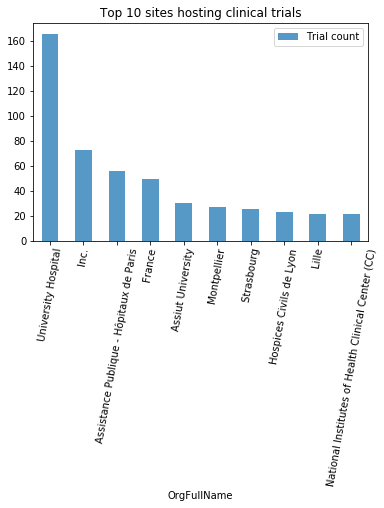

In [58]:
# Code not used in final output

# create a list of the unique organizations
unique_orgs = new_df_org["OrgFullName"].unique()

# create a measure for the number of trials per org and build a dframe
trial_count_per_org = grouped_schools_df["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_org,})

# plot the trials across treatments on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

# sort the data and limit to 10
dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

# plot the data
try2.plot(kind='bar',alpha=0.75, rot=80)

plt.title('Top 10 sites hosting clinical trials')

In [26]:
# Code not used in final output

# create a list of the orgs and separte by org class
unique_orgs = location_data["OrgClass"].unique()

org_count_group = location_data.groupby("OrgClass")

# create a measure for the number of trials per org and build a dframe
trial_count_per_org = org_count_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_count_per_org,})


df.head()

,Trial count
OrgClass,
FED,9
INDUSTRY,372
NETWORK,30
NIH,29
OTHER,2321


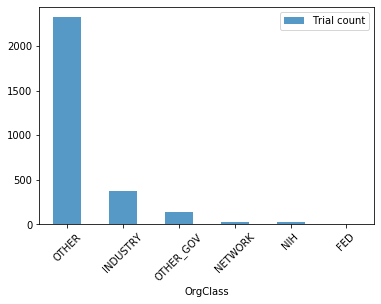

In [27]:
# Code not used in final output

# create a measure for the number of studies per org and build a dframe
trial_count_per_orgc = org_count_group["NCTId"].count()
org_summary_df = pd.DataFrame({"Trial per org": trial_count_per_orgc,})

# plot the studies across classes on a bar chart
x_axis = np.arange(len(unique_orgs))
trial_count = org_summary_df["Trial per org"]

# create data summary
df = pd.DataFrame({"Unique Orgs": unique_orgs,
                                  "Trial count": trial_count,})

dff = df.sort_values(["Trial count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=45)

In [65]:
# Code used in final output

# separate the location status into rows based on NCTId
new_df_org = pd.DataFrame(location_data.LocationStatus.str.split(',').tolist(), index=location_data.NCTId).stack()

new_df_org = new_df_org.reset_index([0, 'NCTId'])
new_df_org.columns = ['NCTId', 'LocationStatus',]


pd.set_option('display.max_rows', new_df_org.shape[0]+1)

new_df_org

,NCTId,LocationStatus
0,NCT04395482,Recruiting'
1,NCT04395482,'Recruiting'
2,NCT04395482,'Recruiting'
3,NCT04395482,'Recruiting'
4,NCT04395482,'Recruiting'
5,NCT04395482,'Recruiting'
6,NCT04395482,'Recruiting'
7,NCT04395482,'Recruiting
8,NCT04395924,Recruiting
9,NCT04476940,


In [66]:
# find out what unique statuses exist
unique_orgs = new_df_org["LocationStatus"].unique()

print(unique_orgs)

["Recruiting'" " 'Recruiting'" " 'Recruiting" 'Recruiting' ''
 " 'Not yet recruiting" "Not yet recruiting'" " 'Not yet recruiting'"
 "Available'" " 'Available'" " 'Available" " 'Suspended'" " 'Active"
 " not recruiting'" 'Active' 'Available' ' not recruiting'
 "Enrolling by invitation'" "Completed'" " 'Withdrawn'" " 'Completed'"
 " 'Completed" " 'Withdrawn" " 'Terminated'"]


In [67]:
# standardize the data for location status

new_df_org["LocationStatus"].replace({"Recruiting'": "Recruiting", " 'Recruiting'": "Recruiting", " 'Recruiting": "Recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Not yet recruiting": "Not yet recruiting", "Not yet recruiting'": "Not yet recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Available'": "Available", " 'Available'": "Available", " 'Available": "Available"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Suspended'": "Suspended"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({" not recruiting'": "Not recruiting"," not recruiting": "Not recruiting", " 'Not yet recruiting'": "Not recruiting"}, inplace=True)
new_df_org["LocationStatus"].replace({"Completed'": "Completed"," 'Completed'": "Completed"," 'Completed": "Completed" }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Active": "Active"}, inplace=True)
new_df_org["LocationStatus"].replace({"Enrolling by invitation'": "Enrolling by invitation"}, inplace=True)
new_df_org["LocationStatus"].replace({" 'Withdrawn'": "Withdrawn"," 'Withdrawn": "Withdrawn", }, inplace=True)
new_df_org["LocationStatus"].replace({" 'Terminated'": "Terminated"}, inplace=True)
new_df_org["LocationStatus"].replace({"": "No status"}, inplace=True)

In [68]:
#print list to ensure data is standardized
unique_status = new_df_org["LocationStatus"].unique()

for i in unique_status:
    print(i)

Recruiting
No status
Not yet recruiting
Not recruiting
Available
Suspended
Active
Enrolling by invitation
Completed
Withdrawn
Terminated


In [75]:
# group the studies by their status
org_status_group = new_df_org.groupby("LocationStatus")

# create a measure for the number of trials per status and build a dframe
trial_status_per_org = org_status_group["NCTId"].count()

# create data summary
df = pd.DataFrame({#"Unique Orgs": unique_orgs,
                    "Trial count": trial_status_per_org,})


df.head(100)

,Trial count
LocationStatus,
Active,67
Available,309
Completed,64
Enrolling by invitation,1
No status,1405
Not recruiting,1069
Not yet recruiting,170
Recruiting,5986
Suspended,5


Text(0.5, 1.0, 'Status of clinical trial sites for COVID-19')

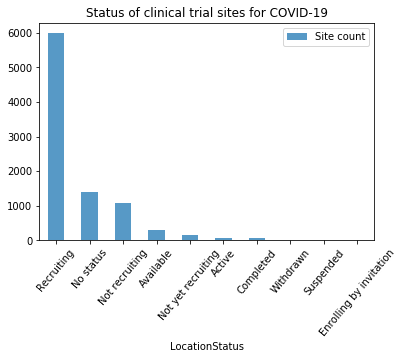

In [76]:
# create a measure for the number of trials per status and build a dframe
trial_count_per_status = org_status_group["NCTId"].count()
status_summary_df = pd.DataFrame({"Trial per status": trial_count_per_status,})

# plot the trials across status on a bar chart
x_axis = np.arange(len(unique_orgs))
site_count = status_summary_df["Trial per status"]


# create data summary
df = pd.DataFrame({"Unique Orgs": unique_status,
                                  "Site count": site_count,})

dff = df.sort_values(["Site count"], ascending=False).groupby('Unique Orgs').head(10)

try2 = dff.head(10,)

try2.plot(kind='bar',alpha=0.75, rot=50)

plt.title('Status of clinical trial sites for COVID-19')

In [81]:
# find the total number of locations
Total_Locations = df["Site count"].sum()

Total_Locations

9087

In [82]:
# Add blanks to avoid double counts
new_df_org["LocationStatus"].replace({"No Status": ""}, inplace=True)

# group the sites by their trial names and find the locations per trial
grouped_sites = new_df_org.groupby(['NCTId'])
Sites_per_study = grouped_sites["LocationStatus"].count()

# build a dataframe with Sites per studies and convert sites to number
grade_summary_df = pd.DataFrame({"Sites per Study": Sites_per_study})
grade_summary_df["Sites per Study"] = grade_summary_df.loc[:, "Sites per Study"].astype(float)


pd.set_option('display.max_rows', grade_summary_df.shape[0]+1)

print(grade_summary_df)

             Sites per Study
NCTId                       
NCT01306084              1.0
NCT02517489             32.0
NCT02656381              1.0
NCT02735707             90.0
NCT02765191              1.0
NCT02788903              1.0
NCT02875301              5.0
NCT02901041              1.0
NCT03042143              1.0
NCT03105102            505.0
NCT03175796              1.0
NCT03184662             20.0
NCT03260140              1.0
NCT03261050              3.0
NCT03276559              4.0
NCT03305341              1.0
NCT03323463              8.0
NCT03331445              1.0
NCT03348670              1.0
NCT03376854              1.0
NCT03398135            379.0
NCT03452774              1.0
NCT03620409              1.0
NCT03648372              8.0
NCT03680274              1.0
NCT03681288              1.0
NCT03684980              8.0
NCT03710746              2.0
NCT03716869              1.0
NCT03724045              1.0
NCT03728257              1.0
NCT03793673              1.0
NCT03807804   

In [79]:
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 5, 10, 25, 50, 100, 1000]

# Create the names for the bins
group_names = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# add a column of the bins to the table
pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names).head()
grade_summary_df["Site Range"] = pd.cut(grade_summary_df["Sites per Study"], bins, labels=group_names)

# Create a GroupBy object based upon range
budget_group = grade_summary_df.groupby("Site Range")

# Find how many rows fall into each bin
print(budget_group["Site Range"].count())

Site Range
1              2425
2               125
3                66
4 or 5           81
6 to 10          92
11 to 25         67
26 to 50         27
51 to 100        18
101 or more       4
Name: Site Range, dtype: int64


Text(0, 0.5, 'Number of Trials')

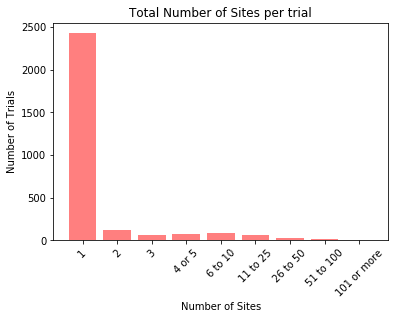

In [83]:
# create list of site numbers
sites = ["1", "2", "3", "4 or 5", "6 to 10", "11 to 25", "26 to 50", "51 to 100", "101 or more"]

# create a count of the sites per study
site_count = budget_group["Sites per Study"].count()
x_axis = np.arange(len(sites))


# plot the site ranges as x and trial count as y
plt.bar(x_axis, site_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(rotation=45)
plt.xticks(tick_locations, sites)

# add title and axis labels
plt.title("Total Number of Sites per trial")
plt.xlabel("Number of Sites")
plt.ylabel("Number of Trials")